# Lab 4 - Integration Exercises 

### Grading: 
We will be doing the cyclic grading cycle for this assignment.  See the complete syllabus - posted on Moodle - some detailed notes on grading and correcting your work.

Do your work in this file, so it is easy for me to find/grade.  However, there are good reasons to use multiple files in traditional coding projects, so if you have a good reason to want to make a new file, please talk to me about how to make that work.

#### Version-0: 
Switch back to the Version-0 branch in labs to do this work.  Before you leave lab today, commit your changes to GitHub, and open a pull request, comparing your forked Version-0 branch back to my original repository.  That's all.

#### Version-1: 
By Monday 5:00pm, clean up any unfinished details.  
   * Every code should be well documented with comments.
   * __Every function should have a docstring.__
   * Every graph should be well labeled.  If there is more than one data set or curve, add a legend.
   * Describe each graph with a short paragraph.  What is data plotted, why is it interesting, what model fits that data, is this the model you expect?  Give a written scientific description in complete sentences.  Feel free to modify these prompts to suit the particular graph.
   * Open a pull request on GitHub comparing your forked Version-1 branch back to my original repository.

#### Version-2*: 
After class on Monday, I will post my solution.  
   * Compare our solutions, and look for places you could improve your work 
     * Are your calculations correct?
     * Did you understand (and describe) the physics correctly? 
     * Did you forget anything?
   * Make improvements and comments about your changes.  

\*I called this the Final Version in the syllabus. 

-----------------------------------------------------------------------------------------------
## from Newman w/ modifications and additions
-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------
### Newman Exercise 5.1 - original problem.
-----------------------------------------------------------------------------------------------
In the on-line resources you will find a file called
```velocities.txt```, which contains two columns of numbers, the first
representing time~$t$ in seconds and the second the $x$-velocity in
 meters per second of a particle, measured once every second from time
$t=0$ to $t=100$.  The first few lines look like this:
```python
0	0
1	0.069478
2	0.137694
3	0.204332
4	0.269083
5	0.331656
```
Write a program to do the following:
* Read in the data and, using the trapezoidal rule, calculate from them
  the approximate distance traveled by the particle in the $x$ direction as
  a function of time.  See Section 2.4.3 on page 57 if you want a reminder
  of how to read data from a file.
* Extend your program to make a graph that shows, on the same plot,
  both the original velocity curve and the distance traveled as a function
  of time.
  
-----------------------------------------------------------------------------------------------
### Newman Exercise 5.1 - notes and modifications.
-----------------------------------------------------------------------------------------------
This problem is funny - you can't use your algorithm for calculating the trapezoid method for a function, you have to do something quite different here - calculate the area of each trapezoid given both its legs.  You also need to store each step in an array, so you can plot the displacement as a function of time.  

I recommend you grab a whiteboard and work this out ahead of coding it.

Be sure to:
1.  Make separate plots for $x$ vs. $t$ and the $v$ vs. $t$ so you can see the details on $v$.
2.  Add labels to your plots - as many as needed to clearly convey the physics.
3.  Describe your plots physically - be sure to explain the relationship between the $x$ vs. $t$ to the $v$ vs. $t$, so it is clear the numerical integration is a good model for the given velocity data.

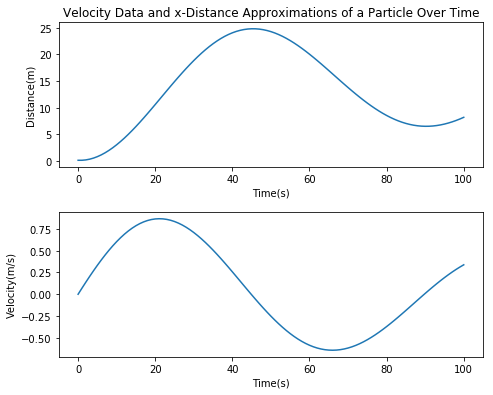

In [2]:
### YOUR Solutions Newman 5.1
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

data = plt.loadtxt("velocities.txt")

time = data[: ,0] # time in seconds
velocity = data[: ,1] # x velocity of a particle in maters per second

# Defines the Trapezoidal Rule Function:
N = 100
h = int((time[len(time)-1] - time[0]) / N)

def trapezoidRule(t):
    """Calculates the position of a particle, approximated with the trapezoidal rule, as a function of time.
    
    Argements: time
    
    Returned: position approximated with the trapezoidal rule."""
    
    integralTrap = []
    for m in range(0,N+1): # Loops for every segment
        sumTrap = 0.5*velocity[0] + 0.5*velocity[len(velocity)-1] # Adds the starting and ending values
        for i in range(1,int(t[m])): # Adds the trapezoids for each segment up to the current one
            sumTrap += velocity[i*h]

        integralTrap.append(sumTrap * h)

    return integralTrap

positionT = trapezoidRule(time)

#make the plot
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(7, 5.6))

ax1.plot(time,positionT)
ax1.set_ylabel("Distance(m)")
ax1.set_xlabel("Time(s)")

ax2.plot(time,velocity)
ax2.set_ylabel("Velocity(m/s)")
ax2.set_xlabel("Time(s)")

ax1.set_title("Velocity Data and x-Distance Approximations of a Particle Over Time")
plt.tight_layout()

These plots show the velocity vs time and position vs time data for a moving particle. The lower plot represents the origional velocity data, and the upper plot represents the position that was calcualted using the trapezoid rule. We can see that this is consistant with the definition of displacement and velocity, because when the particle's position is sloped upwards, indicating that it is moving in the positive direction, the velocity is also positive. And when the particle is moving in the negative direction, the velocity is negative.

-----------------------------------------------------------------------------------------------
### Newman Exercise 5.3 - original problem.
-----------------------------------------------------------------------------------------------
Consider the integral
$$
E(x) = \int_0^x e^{-t^2} dt.
$$
1. Write a program to calculate $E(x)$ for values of $x$ from 0 to 3 in
  steps of 0.1.  Choose for yourself what method you will use for
  performing the integral and a suitable number of slices.
  
2. When you are convinced your program is working, extend it further to
  make a graph of $E(x)$ as a function of $x$.  If you want to remind
  yourself of how to make a graph, you should consult Section 3.1, starting
  on page 88.

Note that there is no known way to perform this particular integral
analytically, so numerical approaches are the only way forward.

-----------------------------------------------------------------------------------------------
### Newman Exercise 5.3 - notes and modifications.
-----------------------------------------------------------------------------------------------

The Gaussian integral does have analytic solutions in the limit from $-\infty$ to $\infty$.
It is a very usefull and famous integrals, and there are many fun ways to work 
out useful solutions.  For instance: 
$$
\int_{-\infty}^{\infty} e^{-t^2} dt = \sqrt{\pi}
$$
ref: https://en.wikipedia.org/wiki/Gaussian_integral

Calculate the Gaussian interval over an even interval (for instance a=-1, b=1) and check that you get the expected result under reasonable numerical approximations.  Check this for several intervals.  Calculate the percent difference between your value and the expected as the interval grows larger.  At when does your integral agree with the exact result within rounding error?  Make a table summarizing your work, and plot of $b$ vs. $error$ to show this.

Make a plot of the function $E(x)$ vs. $x$ along with the integral both for Newman's example and the additional question.

In [3]:
import integrate 
import math

print(help(integrate.integrate))

Help on function integrate in module integrate:

integrate(f, interval, steps, order=1, float_type=<class 'float'>)
    Evaluate integral by Newton-Cotes rule (trapezoidal, Simpson's, etc.).
    
    f: function to integrate
    interval: tuple integration region (a,b)
    steps: number of integration steps (must be valid for order chosen)
    order (optional): integer order for integration (1..4)
    float_type: float type to which each term is converted before addition
    
    returns:
        total_integral (floating point number)
        x_array (1D np.array containing independent variable)
        I_array (1D np.array containing integrated values)

None


Exact Value =  1.7724538509055159
Integral over range (-1,1) =  1.4934520527929018
Error for (-1,1) =  15.740990828623092 %
Integral over range (-5,5) =  1.772453850901918
Error for (-1,1) =  2.029834927302753e-10 %
Integral over range (-10,10) =  1.7724538509055163
Error for (-1,1) =  2.50550506363359e-14 %
Integral over range (-20,20) =  1.7724545625091666
Error for (-1,1) =  4.014793673234603e-05 %


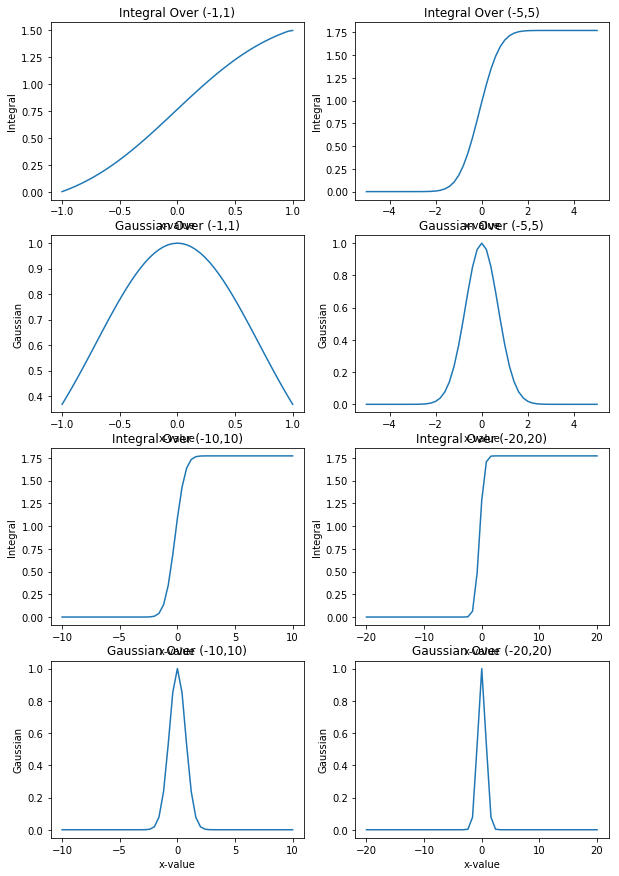

In [8]:
# Additional Question

def gaussian(t):
    """Calculates the result of the gaussian function.
    
    Arguement: t - the value or array being evaluated
    
    Values Returned: output - the height of the gaussian at t"""
    
    output = np.exp(-t**2)
    return output

def error(expected, measured):
    """Calcultates the error of an approximation given an exact value
    
    Arguements: expected and exact values
    
    Values Returned: the percent error"""
    
    percent_error = 100 * abs(expected - measured) / expected
    return percent_error

steps = 50 # Sets number of steps to integrate by
exact = math.sqrt(math.pi) # Calculates the exact value of the integral

# Uses the inegrate function to calculate the integral of the gaussian function over various ranges
# I chose ranges (-1,1), (-5,5), (-10,10), and (-20,20)
values1, x_array1, I_array1 = integrate.integrate(gaussian,(-1,1),steps,1,float)
errors1 = error(exact, values1)

values5, x_array5, I_array5 = integrate.integrate(gaussian,(-5,5),steps,1,float)
errors5 = error(exact, values5)

values10, x_array10, I_array10 = integrate.integrate(gaussian,(-10,10),steps,1,float)
errors10 = error(exact, values10)

values20, x_array20, I_array20 = integrate.integrate(gaussian,(-20,20),steps,1,float)
errors20 = error(exact, values20)

# Calcultaes a gaussian over each range
fx1 = []
for i in range(0, len(x_array1)):
    fx1.append(gaussian(x_array1[i]))
    
fx5 = []
for i in range(0, len(x_array5)):
    fx5.append(gaussian(x_array5[i]))
    
fx10 = []
for i in range(0, len(x_array10)):
    fx10.append(gaussian(x_array10[i]))
    
fx20 = []
for i in range(0, len(x_array20)):
    fx20.append(gaussian(x_array20[i]))

# Prints the integral over each range, and compares it to the exact value using the percent error
print("Exact Value = ", exact)
print("Integral over range (-1,1) = ", values1)
print("Error for (-1,1) = ", errors1, "%")
print("Integral over range (-5,5) = ", values5)
print("Error for (-1,1) = ", errors5, "%")
print("Integral over range (-10,10) = ", values10)
print("Error for (-1,1) = ", errors10, "%")
print("Integral over range (-20,20) = ", values20)
print("Error for (-1,1) = ", errors20, "%")

# Plots the integral and the gaussian of each range
plt.figure(figsize = (10,15)) # Resizes plot so that it's legible
ax = plt.subplot(4,2,1)
plt.plot(x_array1, I_array1)
plt.title("Integral Over (-1,1)")
plt.xlabel("x-value")
plt.ylabel("Integral")

ax = plt.subplot(4,2,2)
plt.plot(x_array5, I_array5)
plt.title("Integral Over (-5,5)")
plt.xlabel("x-value")
plt.ylabel("Integral")

ax = plt.subplot(4,2,3)
plt.plot(x_array1, fx1)
plt.title("Gaussian Over (-1,1)")
plt.xlabel("x-value")
plt.ylabel("Gaussian")

ax = plt.subplot(4,2,4)
plt.plot(x_array5, fx5)
plt.title("Gaussian Over (-5,5)")
plt.xlabel("x-value")
plt.ylabel("Gaussian")

ax = plt.subplot(4,2,5)
plt.plot(x_array10, I_array10)
plt.title("Integral Over (-10,10)")
plt.xlabel("x-value")
plt.ylabel("Integral")

ax = plt.subplot(4,2,6)
plt.plot(x_array20, I_array20)
plt.title("Integral Over (-20,20)")
plt.xlabel("x-value")
plt.ylabel("Integral")

ax = plt.subplot(4,2,7)
plt.plot(x_array10, fx10)
plt.title("Gaussian Over (-10,10)")
plt.xlabel("x-value")
plt.ylabel("Gaussian")

ax = plt.subplot(4,2,8)
plt.plot(x_array20, fx20)
plt.title("Gaussian Over (-20,20)")
plt.xlabel("x-value")
plt.ylabel("Gaussian")

plt.show()

These plots show a gaussian curve, along with the integral of that curve within various ranges. The integral was calcuated using the integrate function. The first row shows the integral over range (-1,1) and (-5,5), and direclty below these are their corresponding gaussian curves. The third row shows the integral over range (-10,10) and (-20,20), and direclty below these are their corresponding gaussian curves. For each interval, we can see that the integral increases sharply when it is close to zero, and then levels off as it moves further from zero. This is to be expected, because the gaussian peaks around zero, and then levels off, and approaches zero as the x-value approaches positive and negative infinity. This explains why the error in the integral decreses as the range increses. As the range gets larger, the integral includes more values form the gaussian, and becomes closer to the origional value.

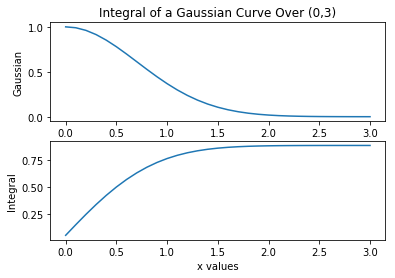

Value of integral:  0.8862067342802121


In [10]:
# Newman's Version

# Uses the integrate function to produce an x array and an integral array
value, x_array, I_array = integrate.integrate(gaussian,(0,3),30,1,float)

# Produces a gaussian array
fx = []
for i in range(0, len(x_array)):
    fx.append(gaussian(x_array[i]))
       
# Plots the integral and the gaussian so that theyre stacked on top of eachother
ax = plt.subplot(2,1,1)
plt.plot(x_array,fx)
plt.title("Integral of a Gaussian Curve Over (0,3)")
plt.xlabel("x values")
plt.ylabel("Gaussian")

ax = plt.subplot(2,1,2)
plt.plot(x_array,I_array)
plt.xlabel("x values")
plt.ylabel("Integral")

plt.show()
print("Value of integral: ", value)

These plots follow Newma's exercise 5.3. The top plot depicts a gaussian curve over the range (0,3) and the bottom one depicts its integral. Since this calcualtion only includes the positive values of the gaussian, the integral is only equal to about half that of the accepted value. It has the same basic shape as the integrals of the previous plot, however, when x = 0 the integral also equals zero, because the area under the gaussian curve for negative x-values was not taken into account.

### Newman Exercise 5.4: The diffraction limit of a telescope

Our ability to resolve detail in astronomical observations is
limited by the diffraction of light in our telescopes.  Light from stars
can be treated effectively as coming from a point source at infinity.  When
such light, with wavelength $\lambda$, passes through the circular aperture
of a telescope (which we'll assume to have unit radius) and is focused by
the telescope in the focal plane, it produces not a single dot, but a
circular diffraction pattern consisting of central spot surrounded by a
series of concentric rings.  The intensity of the light in this diffraction
pattern is given by
$$
I(r) = \biggl( {J_1(kr)\over kr} \biggr)^2,
$$
where $r$ is the distance in the focal plane from the center of the
diffraction pattern, $k=2\pi/\lambda$, and $J_1(x)$ is a Bessel function.
The Bessel functions $J_m(x)$ are given by
$$
J_m(x) = {1\over\pi} \int_0^\pi \cos(m\theta - x\sin\theta) ~d\theta,
$$
where $m$ is a nonnegative integer and $x\ge0$.
1. Write a Python function ```J(m,x)``` that calculates the value of
  $J_m(x)$ using Simpson's rule with $N=1000$ points.  Use your
  function in a program to make a plot, on a single graph, of the Bessel
  functions $J_0$, $J_1$, and $J_2$ as a function of $x$ from $x=0$ to
  $x=20$.
2. Make a second program that makes a density plot of the intensity of
   the circular diffraction pattern of a point light source with
   $\lambda=500$ nm, in a square region of the focal plane, using the
   formula given above.  Your picture should cover values of $r$ from zero
   up to about $1\,\mu$m.


*Hint 1:* You may find it useful to know that $\lim_{x\to0} J_1(x)/x = 1/2$.  

*Hint 2:* The central spot in the diffraction pattern is
so bright that it may be difficult to see the rings around it on the
computer screen.  If you run into this problem a simple way to deal with it
is to use one of the other color schemes for density plots described in
Section~3.3.  The ``hot`` scheme works well.  For a more
sophisticated solution to the problem, the ``imshow`` function has an
additional argument ``vmax`` that allows you to set the value that
corresponds to the brightest point in the plot.  For instance, if you say
``imshow(x,vmax=0.1)``, then elements in ``x`` with value 0.1, or
any greater value, will produce the brightest (most positive) color on the
screen.  By lowering the ``vmax`` value, you can reduce the total range
of values between the minimum and maximum brightness, and hence increase
the sensitivity of the plot, making subtle details visible.  (There is also
a ``vmin`` argument that can be used to set the value that corresponds
to the dimmest (most negative) color.)  For this exercise a value of
``vmax=0.01`` appears to work well.

In [12]:
#DM I've written the Bessel function code to get you started
#but you need to figure out how to call it and use it

def J(m,x):
    '''Calculate the Bessel function'''
    
    
    def f_theta(theta):
        func_arg = 1/math.pi * math.cos(m*theta - x*math.sin(theta))
        return func_arg         
        
    I = integrate.integrate(f_theta,(a,b),N,order=2)[0]
    
    return I


#######################################
#Part 1 - plotting the Bessel Function
#######################################


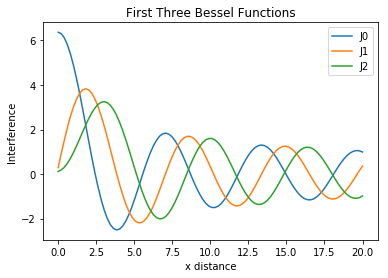

In [18]:
# Initialize parameters for integration
N = 1000
a = 0
b = 20
x_values = np.linspace(0,20,100) # x values are in 

# Initialize empty Bessel arrays
J0 = []
J1 = []
J2 = []

# Fill the arrays using the Bessel functions
for m in x_values:
    J0.append(J(0,m))
    J1.append(J(1,m))
    J2.append(J(2,m))
    
# Plots the three Bessel functions on the same plot    
plt.plot(x_values, J0, label = "J0")
plt.plot(x_values, J1, label = "J1")
plt.plot(x_values, J2, label = "J2")
plt.title("First Three Bessel Functions")
plt.xlabel("x distance")
plt.ylabel("Interference")
plt.legend()
plt.show()

This plot depicts the first three Bessel functions, m = 0, m = 1, and m = 2. The model that fits each of these curves is a combination of sines and cosines that decreases in magnitude over time. As the order of the Bessel function increases, there is a horizontal phase shift, because there is a factor of m multiplied by theta within the cosine function. Physically, these waves represent a diffraction pattern centered around one point. This makes sense given what we have previouly learned about how light interferes with itself. There is a lot of interference towards the origin, and the interference decreses as the light moves away from the origin.

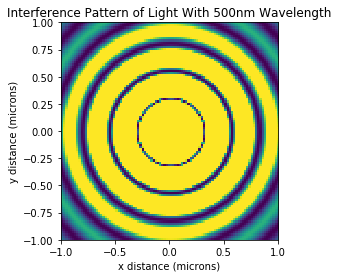

In [24]:
#I've given you some dimensions to get you started, 
# code up the diffraction pattern from here

#########
#Part 2 - plotting the diffraction pattern
#########
lambda1 = 500e-9          #500 nm
k = 2.0*math.pi/lambda1   
x_max=1e-6                #1 micron - make this the the approximate scale of your problem
N = 100

size = 50                 # Sets number of points to be evaluated
pattern = np.empty([size*2, size*2], float) # Creates empty array of desired size
for i in range(size*2):
    for l in range(size*2):
        x = ((i-size) * x_max)/size  # Calculates x, y, and r distances in microns based on position in array
        y = ((l-size) * x_max)/size
        radius = np.sqrt(x**2 + y**2)
        if radius > (0.01 * x_max):  # Avoids dividing by zero
            pattern[i,l] = (J(1,k*radius)/(k*radius))**2 # Calculates the inedisty at a given point
        else:
            pattern[i,l] = 1/4
            
plt.imshow(pattern, vmax = 0.01, extent = [-1,1,-1,1])
plt.title("Interference Pattern of Light With 500nm Wavelength")
plt.xlabel("x distance (microns)")
plt.ylabel("y distance (microns)")
plt.show()

This density plot shows the interference pattern of light with 500nm wavelength. The intesity is depended on the raidial distance from the origin. It was calcualted using the Bessel function J1. The data can be fitted to a sin^2 wave that decreses in magnitude the further the wave gets from the origin. This is consistant with what we have prevoiusly learned about light interference. 